# Dataset Description

## Features (X)

- **flength**
- **fwidth**
- **fsize**
- **fConc**
- **fConc1**
- **fAsym**
- **fM3Long**
- **fM3Trans**
- **fAlpha**
- **fDist**

## Target (y)

- **class** target class label


`Imports`


In [34]:
import pandas as pd
import numpy as np

`pandas`: library used for dealing with data in an csv file loading it and putting it in a pandas dataframe (2D table) having rows and columns


`numpy`: used for fast calculations mainly on arrays


In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix,
    f1_score,
)

`sklearn`:
importing the KNeigboursClassifier model/
preprocessing min-max scaling (to avoid features from dominating)/metric (given target and predictions produce some values to tell how bad the model is)


## Data preprocessing


In [36]:
# ------1. Data Preprocessing------------
# reading the data from the csv into the data frame in pandas
df = pd.read_csv("telescope_data.csv")

In [37]:
df.head(1)

,Unnamed: 0,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.011,-8.2027,40.092,81.8828,g


In [38]:
df["class"]

0        g
1        g
2        g
3        g
4        g
        ..
19015    h
19016    h
19017    h
19018    h
19019    h
Name: class, Length: 19020, dtype: object

In [39]:
df["class"].value_counts()

class
g    12332
h     6688
Name: count, dtype: int64

syntax:
df['column name'] this would return the index(by default pandas just numbered them auto increment) and will return the data of the column you specified
df['column_name'].value_counts() counts the occurrences of each unique value of the column name for example here class has two values g and h so it counted all the rows that had the class=g and all the rows that has the class=h


In [40]:
# 1. dropping the unnamed column
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head(1)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.011,-8.2027,40.092,81.8828,g


`1.dropping the unnamed column` removed the index that was in the excel file because this is not a feature that we want to calculate the distance about we want to calculate the ecludiean distance between features of points
`Why do we have to remove it ?`

1. because we are calculating the distance based on the actual features of the input.
2. let's visualize having sample 1 and 1000 if distance would be (1000-1)^2 + ....... they may actually be close and similar but because the index dominates a very huge distance (it will be classified as far and the index isnt even a part of the features of the input data that we are trying to compare)

`syntax`
drop helps us remove columns or rows
df.drop() by default will remove rows
so we specify we want to remove columns with the name unnamed: 0
inplace means modify the df in place (instead of returning a new copy)


`Checking for duplicates after dropping the index column that would've made them all unique`


In [41]:
df.duplicated().sum()

115

In [42]:
df.shape

(19020, 11)

In [43]:
df = df.drop_duplicates()

In [44]:
df.shape

(18905, 11)

In [45]:
df.groupby("class").head(3)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
12332,93.7035,37.9432,3.1454,0.1680,0.1011,53.2566,89.0566,11.8175,14.1224,231.9028,h
12333,102.0005,22.0017,3.3161,0.1064,0.0724,-54.0862,43.0553,-15.0647,88.4636,274.9392,h
12334,100.2775,21.8784,3.1100,0.3120,0.1446,-48.1834,57.6547,-9.6341,20.7848,346.4330,h


`2.2 why do we have to use groupby`
because we want to select randomly the min_number from both classes
if we didnt use group by we would've selected randomly the min_value from the table in total not from both classes
`groupby` just dividing the data into seperate groups based on the unique values of the column name based


In [46]:
df["class"].value_counts()

class
g    12332
h     6573
Name: count, dtype: int64

In [47]:
df["class"].value_counts().min()

6573

`2.1 getting min of 2 classes`
`min class` is the h with count = 6688 will try to randomly select 6688 from both classes
so that we prevent if k got greater from being biased to the majority class


In [48]:
df.head(10)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
5,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
6,48.2468,17.3565,3.0332,0.2529,0.1515,8.5730,38.0957,10.5868,4.7920,219.0870,g
7,26.7897,13.7595,2.5521,0.4236,0.2174,29.6339,20.4560,-2.9292,0.8120,237.1340,g
8,96.2327,46.5165,4.1540,0.0779,0.0390,110.3550,85.0486,43.1844,4.8540,248.2260,g
9,46.7619,15.1993,2.5786,0.3377,0.1913,24.7548,43.8771,-6.6812,7.8750,102.2510,g


In [49]:
min_value = df["class"].value_counts().min()
df_balanced = df.groupby("class").sample(n=min_value, random_state=50)
df_shuffled = df_balanced.sample(frac=1, random_state=50)
df_shuffled.head(10)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
8318,54.5985,20.5114,2.7427,0.4286,0.2251,-25.3734,-28.8119,-15.5386,3.6790,316.4230,g
10955,82.0557,31.9178,3.4785,0.2785,0.1739,27.1880,39.5205,17.7326,2.2334,367.0510,g
1572,102.9340,36.3217,4.0231,0.1131,0.0584,51.4017,83.3996,-23.4473,0.5982,321.1690,g
16492,19.2593,15.2488,2.7701,0.4217,0.2390,-25.5023,11.1513,13.3488,20.7450,88.9016,h
15221,12.9176,11.3596,2.1123,0.7413,0.3900,15.0388,-5.6768,-11.5638,64.9330,227.1070,h
552,46.3641,13.7186,2.9763,0.3675,0.2540,42.3198,31.0888,-10.1393,10.4919,209.6840,g
12537,32.9878,8.1677,2.3956,0.5133,0.2637,38.2928,-24.1729,-10.2392,68.9474,120.1013,h
16197,16.5431,10.4410,2.3801,0.5896,0.3151,22.2053,8.8734,12.6436,30.0060,214.6450,h
9455,30.3146,12.5905,2.7251,0.5311,0.3343,11.0797,27.3951,-9.7683,17.1453,166.0320,g
17193,24.4639,22.4218,2.6289,0.4371,0.2503,0.7043,-21.2863,16.2589,87.9369,70.7253,h


`problem 1` here is that the indices are messed up to make it better we use .reset_index()


In [50]:
min_value = df["class"].value_counts().min()
df_balanced = df.groupby("class").sample(n=min_value, random_state=50)
df_shuffled = df_balanced.sample(frac=1, random_state=50).reset_index()
df_shuffled.head(10)

,index,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,8318,54.5985,20.5114,2.7427,0.4286,0.2251,-25.3734,-28.8119,-15.5386,3.6790,316.4230,g
1,10955,82.0557,31.9178,3.4785,0.2785,0.1739,27.1880,39.5205,17.7326,2.2334,367.0510,g
2,1572,102.9340,36.3217,4.0231,0.1131,0.0584,51.4017,83.3996,-23.4473,0.5982,321.1690,g
3,16492,19.2593,15.2488,2.7701,0.4217,0.2390,-25.5023,11.1513,13.3488,20.7450,88.9016,h
4,15221,12.9176,11.3596,2.1123,0.7413,0.3900,15.0388,-5.6768,-11.5638,64.9330,227.1070,h
5,552,46.3641,13.7186,2.9763,0.3675,0.2540,42.3198,31.0888,-10.1393,10.4919,209.6840,g
6,12537,32.9878,8.1677,2.3956,0.5133,0.2637,38.2928,-24.1729,-10.2392,68.9474,120.1013,h
7,16197,16.5431,10.4410,2.3801,0.5896,0.3151,22.2053,8.8734,12.6436,30.0060,214.6450,h
8,9455,30.3146,12.5905,2.7251,0.5311,0.3343,11.0797,27.3951,-9.7683,17.1453,166.0320,g
9,17193,24.4639,22.4218,2.6289,0.4371,0.2503,0.7043,-21.2863,16.2589,87.9369,70.7253,h


`problem 2` now we have the index as a column that will be taken into consideration with us in the distance calculations so we have to drop it


In [51]:
min_value = df["class"].value_counts().min()
# 2.2 groupby
# 2.3 balancing: making both classes have the same #of samples
df_balanced = df.groupby("class").sample(n=min_value, random_state=50)
# 2.4 shuffling
df_shuffled = df_balanced.sample(frac=1, random_state=50).reset_index(drop=True)
df_shuffled.head(10)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,54.5985,20.5114,2.7427,0.4286,0.2251,-25.3734,-28.8119,-15.5386,3.6790,316.4230,g
1,82.0557,31.9178,3.4785,0.2785,0.1739,27.1880,39.5205,17.7326,2.2334,367.0510,g
2,102.9340,36.3217,4.0231,0.1131,0.0584,51.4017,83.3996,-23.4473,0.5982,321.1690,g
3,19.2593,15.2488,2.7701,0.4217,0.2390,-25.5023,11.1513,13.3488,20.7450,88.9016,h
4,12.9176,11.3596,2.1123,0.7413,0.3900,15.0388,-5.6768,-11.5638,64.9330,227.1070,h
5,46.3641,13.7186,2.9763,0.3675,0.2540,42.3198,31.0888,-10.1393,10.4919,209.6840,g
6,32.9878,8.1677,2.3956,0.5133,0.2637,38.2928,-24.1729,-10.2392,68.9474,120.1013,h
7,16.5431,10.4410,2.3801,0.5896,0.3151,22.2053,8.8734,12.6436,30.0060,214.6450,h
8,30.3146,12.5905,2.7251,0.5311,0.3343,11.0797,27.3951,-9.7683,17.1453,166.0320,g
9,24.4639,22.4218,2.6289,0.4371,0.2503,0.7043,-21.2863,16.2589,87.9369,70.7253,h


`.sample()` either takes n (a specific # of rows) or frac (frac is % of the rows)
`df_balanced = df.groupby("class").sample(n=min_value, random_state=50)`
sampling after groupby -> pickcing randomly from both classes min_value # of rows and the random_state is the seed for the # random generator to produce the same results everytime it randomize -> why to be fair if we are testing for the hyperparameter k then the accurracy is based on k not because of the change in data(and for accuracy to be the same everytime we run)
`df_shuffled = df_balanced.sample(frac=1, random_state=50)`
sampling-> randomly selecting some rows from the table (100% of the table so that is `mixing them up` -> why is it important because if we keep them g at the top h later when splitting then most of the training data will be g while the validation and test will be h which the model never knew of and was never trained for)


`random_state` why need random state if we are always taking the whole table because we need to have the same order because when we split we want to have the same sets to be fair when testing for hyperparamters


In [52]:
df_shuffled["class"].value_counts()

class
g    6573
h    6573
Name: count, dtype: int64

`check` if they both have the same #of samples now


`Separating labels (Y) From features (X)`


In [53]:
# 3. Separate X(inputs) and Y(labels)
X = df_shuffled.drop(columns=["class"], inplace=False)
Y = df_shuffled["class"]

In [54]:
X.head(1)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,54.5985,20.5114,2.7427,0.4286,0.2251,-25.3734,-28.8119,-15.5386,3.679,316.423


In [55]:
Y.head(10)

0    g
1    g
2    g
3    h
4    h
5    g
6    h
7    h
8    g
9    h
Name: class, dtype: object

In [56]:
# 4.splitting
n = len(df_shuffled)
# pandas expect integers it wont take floats (will not take 1.7 row for example that is why convert them to int)
train_end = int(0.7 * n)
validation_end = int(0.85 * n)

In [64]:
# use array slicing that is overridden by pandas
# to be as if it is selecting rows arr[:2] then it will have rows 0 and 1

# --scaling--
scaler = MinMaxScaler()
X_train = X[:train_end]
X_train = scaler.fit_transform(X_train)
Y_train = Y[:train_end]

X_valid = X[train_end:validation_end]
X_valid = scaler.transform(X_valid)
Y_valid = Y[train_end:validation_end]

X_test = X[validation_end:]
X_test = scaler.transform(X_test)

Y_test = Y[validation_end:]

In [65]:
Y_train.count()

9202

In [66]:
Y_test.count()

1972

In [67]:
Y_valid.count()

1972

In [68]:
# -----------2.Manual knn------------
# distance
def Euc_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

`Calculating the Euclidean distance` using numpy first it subtracts each corresponding elements in the 2 arrays x1,x2 then gives are result (x1[0]-x2[0]),(x1[1],x2[1]),..... and then it gets the square of each element produced as a result of subtraction -> giving an output it then will take this output and square each element in it (the output it will sum all of this together then the output -> will take a sqrt)


In [69]:
# X could be the validation set or the test
def knn(X_train, Y_train, X, k):
    # chnaging them to numpy arrays for faster computations
    Xtrain = np.array(X_train)
    Ytrain = np.array(Y_train)
    x = np.array(X)
    Y_predicted = []
    for validation_sample in x:
        distances = []
        # defining an empty array to store all the distance between a
        # specific point and the training points
        for training_sample in Xtrain:
            distances.append(Euc_distance(validation_sample, training_sample))

        distance = np.array(distances)
        # k-nearest (returns the indicies of the nearest k elements)
        k_nearest = np.argsort(distance)[:k]

        # getting their labels
        predicted = Ytrain[k_nearest]
        # getting the labels of the k nearest (numpy feature is to pass array of indices returns an array of the elements at these indices)

        # majority
        labels, counts = np.unique(predicted, return_counts=True)
        majority_prediction = labels[np.argmax(counts)]
        # if the are equal the np.argmax will give us the first max
        Y_predicted.append(majority_prediction)
    return Y_predicted

In [71]:
# testing for multiple k values
# k < root n (which is root 13376 = 115)
kValues = [1, 3, 5, 7, 11, 13, 15, 20, 50, 60, 70, 100]
yValid = np.array(Y_valid)
accuracies = []
print("Manual knn")
for k in kValues:
    y_valid_prediction = knn(X_train, Y_train, X_valid, k)
    accuracy = np.mean(
        yValid == np.array(y_valid_prediction)
    )  # this will return an array of true and false true =1 and false =0 (it will add the 0's and 1's having the correctly predicted / total # of elements in the array (total # of samples))
    print("k= ", k, "accuracy: ", accuracy)
    accuracies.append(accuracy)

best_k = kValues[np.argmax(accuracies)]
print("best k is: ", best_k)

Manual knn
k=  1 accuracy:  0.7824543610547667
k=  3 accuracy:  0.8108519269776876
k=  5 accuracy:  0.8174442190669371
k=  7 accuracy:  0.8179513184584178
k=  11 accuracy:  0.8220081135902637
k=  13 accuracy:  0.8169371196754563
k=  15 accuracy:  0.8144016227180527
k=  20 accuracy:  0.8164300202839757
k=  50 accuracy:  0.8133874239350912
k=  60 accuracy:  0.808316430020284
k=  70 accuracy:  0.8042596348884381
k=  100 accuracy:  0.800709939148073
best k is:  11


`scikit learn` implementation of knn algorithm , all models in knn are python object
it takes a property whose name is n_neighbors that define the k (k-nearest neighbour)


In [77]:
# ------------3.scikit learn----------
accuracies_sk = []
for k in kValues:
    model = KNeighborsClassifier(
        n_neighbors=k
    )  # knn implementation made by scikit learn
    y_pred = model.fit(X_train, Y_train).predict(X_valid)
    accuracy = np.mean(y_pred == Y_valid)
    accuracies_sk.append(accuracy)
    print("sklearn k=", k, "accuracy:", accuracy)

sklearn k= 1 accuracy: 0.7824543610547667
sklearn k= 3 accuracy: 0.8108519269776876
sklearn k= 5 accuracy: 0.8174442190669371
sklearn k= 7 accuracy: 0.8179513184584178
sklearn k= 11 accuracy: 0.8220081135902637
sklearn k= 13 accuracy: 0.8169371196754563
sklearn k= 15 accuracy: 0.8144016227180527
sklearn k= 20 accuracy: 0.8164300202839757
sklearn k= 50 accuracy: 0.8133874239350912
sklearn k= 60 accuracy: 0.808316430020284
sklearn k= 70 accuracy: 0.8042596348884381
sklearn k= 100 accuracy: 0.800709939148073


.fit(X_train,Y_train) -> the model learns from the training data
`Note` KNN is a 'lazy learner' so all it does is just stores the training points it doesn't do any training computations


.predict() predict the values of the X_valdiation (After getting trainned on the test data)
`What it does?`

- compute all distances to all the training points
- find the k nearest neighbors
- pick the class by majority vote
  giving us the y_pred which is the prediction of the validation set now we can compare with the Y_valid which is the correct label to now the accurracy of our model


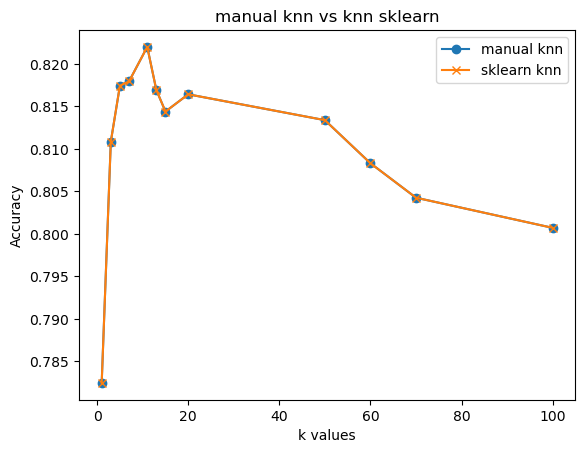

In [78]:
# ----------plot accurracy vs k values ------------
plt.plot(kValues, accuracies, label="manual knn", marker="o")
plt.plot(kValues, accuracies_sk, label="sklearn knn", marker="x")
plt.xlabel("k values")
plt.ylabel("Accuracy")
plt.title("manual knn vs knn sklearn")
plt.legend()  # to show the labels (manual knn and sklearn)
plt.show()

## Predicting the test data after tuning


`starting of with manual knn`


In [79]:
# ---------------prediction the test set after tuning----------
y_test_prediction = np.array(knn(X_train, Y_train, X_test, best_k))
ytest = np.array(Y_test)

`calculating mertic manually`


In [80]:
# ----- Accurracy of manual ------
accuracy_manual = np.mean(Y_test == y_test_prediction)

In [81]:
# ---------- getting the confusion matrix (TP,FP,FN,TN)----------
# predicted positive and it is actually positive
# assuming g is the positive class
TP = np.sum(
    (y_test_prediction == "g") & (ytest == "g")
)  # bitwise and to take each element in the array (not try and evaluate the whole array to true)
# predicted to be negative class = h and it is actually negative
TN = np.sum((y_test_prediction == "h") & (ytest == "h"))
# predicted positive and it is actually negative
FP = np.sum((y_test_prediction == "g") & (ytest == "h"))
FN = np.sum((y_test_prediction == "h") & (ytest == "g"))

In [99]:
print("manual knn:")
print("accuracy ", accuracy_manual)
print("confusion matrix: ")
print(f"[{TP}   {FN}]")
print(f"[{FP}   {TN}]")
precision = TP / (TP + FP)  # out of all positives what was actually positive
print("precision of manual knn: ", precision)
recall = TP / (TP + FN)  # out of all actual positives hm got predicted correctly
print("recall for manual knn: ", recall)
fscore = (2 * (precision * recall)) / (precision + recall)
print("fscore of manual knn: ", fscore)

manual knn:
accuracy  0.815922920892495
confusion matrix: 
[849   124]
[239   760]
precision of manual knn:  0.7803308823529411
recall for manual knn:  0.8725590955806783
fscore of manual knn:  0.8238719068413392


In [93]:
# ----------------metrics using scikit learn built metric
y_test_prediction_sklearn = (
    KNeighborsClassifier(n_neighbors=11).fit(X_train, Y_train).predict(X_test)
)

In [100]:
print("For sklearn: ")
print("accuracy: ", accuracy_score(ytest, y_test_prediction_sklearn))
print("confusion matrix: ", confusion_matrix(ytest, y_test_prediction_sklearn))
print("precision: ", precision_score(ytest, y_test_prediction_sklearn, pos_label="g"))
print("recall: ", recall_score(ytest, y_test_prediction_sklearn, pos_label="g"))
print("fscore: ", f1_score(ytest, y_test_prediction_sklearn, pos_label="g"))

For sklearn: 
accuracy:  0.815922920892495
confusion matrix:  [[849 124]
 [239 760]]
precision:  0.7803308823529411
recall:  0.8725590955806783
fscore:  0.8238719068413392


## 6. Comments on the results


## RESULTS

    Manual knn
    k=  1 accuracy:  0.7824543610547667
    k=  3 accuracy:  0.8108519269776876
    k=  5 accuracy:  0.8174442190669371
    k=  7 accuracy:  0.8179513184584178
    k=  11 accuracy:  0.8220081135902637
    k=  13 accuracy:  0.8169371196754563
    k=  15 accuracy:  0.8144016227180527
    k=  20 accuracy:  0.8164300202839757
    k=  50 accuracy:  0.8133874239350912
    k=  60 accuracy:  0.808316430020284
    k=  70 accuracy:  0.8042596348884381
    k=  100 accuracy:  0.800709939148073
    best k is:  11
    sklearn k= 1 accuracy: 0.7824543610547667
    sklearn k= 3 accuracy: 0.8108519269776876
    sklearn k= 5 accuracy: 0.8174442190669371
    sklearn k= 7 accuracy: 0.8179513184584178
    sklearn k= 11 accuracy: 0.8220081135902637
    sklearn k= 13 accuracy: 0.8169371196754563
    sklearn k= 15 accuracy: 0.8144016227180527
    sklearn k= 20 accuracy: 0.8164300202839757
    sklearn k= 50 accuracy: 0.8133874239350912
    sklearn k= 60 accuracy: 0.808316430020284
    sklearn k= 70 accuracy: 0.8042596348884381
    sklearn k= 100 accuracy: 0.800709939148073


- at k = 1 the model overfits which means that it is too specific to the data set so it can't generalize well (it is senstive to noise)
- it start getting better till the k=11
- it starts decreasing again because now the model starts to underfit (model to simple most probably it may classify a point to the other class) it may be a point very far from the point we are trying to predict but because we are taking a huge k it will still be classifed as that far point (majority)


Comparison observation: Manual and sklearn implementations produce identical results (same accuracy for each k value), confirming the correctness of the manual implementation. why are they identical because they are using the same approach for calculating the distance and majority


| Metric    | KNN Manual | Sklearn KNN |
| --------- | ---------- | ----------- |
| Accuracy  | 0.815      | 0.815       |
| Precision | 0.78       | 0.78        |
| Recall    | 0.87       | 0.87        |
| F1-Score  | 0.82       | 0.82        |
